# Zomato - Exploratory Data Analysis

<p style='text-align: justify;'>The primary objective of this exploratory data analysis project is to gain insights into the Zomato dataset, specifically focusing on understanding the factors influencing the aggregate rating of restaurants, the distribution and characteristics of different types of restaurants across various locations in Bengaluru. We aim to provide a comprehensive overview of the restaurant industry in Bengaluru. By investigating this dataset, we seek to identify trends and patterns that can help both new and established restaurants in the city better understand the competitive landscape and make informed business decisions to thrive in this dynamic market.</p>

## Reading the dataset

In [1]:
# Importing all the necessary libraries in the jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the CSV file
df = pd.read_csv('zomato.csv')

In [3]:
# Exploring the data
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Counting rows and column in the data
df.shape

(51717, 17)

In [5]:
# Retriving all the columns in the dataset
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Data Cleaning

In [6]:
# Dropping unnecessary columns
df = df.drop(['url','address','phone','dish_liked', 'reviews_list','menu_item'], axis= 1)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [9]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(51609, 11)

### Cleaning 'rate' column

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# Removing 'NEW', '-' and '/5' from rate column
def handlerate(value):
    if (value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value [0]
        return float (value)
    
df['rate'] = df['rate'].apply(handlerate)    

In [13]:
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [14]:
df.rate.isnull().sum()

10019

In [15]:
# Filling null values in rate column with mean
df.rate.fillna(df.rate.mean(), inplace= True)

In [16]:
df.rate.isnull().sum()

0

In [17]:
# Checking missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


### Dropping null values

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [20]:
# Exploring the dataset after treating with null and missing values
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### Renaming columns

In [21]:
df.rename(columns= {'approx_cost(for two people)': 'Cost_for_2', 'listed_in(type)': 'type'}, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_2,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### Dropping 'listed_in(city)' column

In [22]:
# Checking unique values in location column
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [23]:
# Checking unique values in listed_in(city) column
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [24]:
# Dropping 'listed_in(city)' column
df = df.drop(['listed_in(city)'], axis= 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### Cleaning 'Cost_for_2' column

In [25]:
df['Cost_for_2'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [26]:
# Removing ',' from 'Cost_for_2' column
def handlecost(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return int(value)
    else:
        return int(value)
    
df['Cost_for_2'] = df['Cost_for_2'].apply(handlecost)

In [27]:
df['Cost_for_2'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

In [28]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### Cleaning 'rest_type' column

In [29]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [30]:
# Creating new variable which holds list of all the rest_type 
rest_types = df['rest_type'].value_counts(ascending= True)
rest_types

rest_type
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Cafe, Food Court                  2
                              ...  
Dessert Parlor                 2242
Delivery                       2574
Cafe                           3682
Casual Dining                 10253
Quick Bites                   19010
Name: count, Length: 93, dtype: int64

In [31]:
# Creating new variable to store all the rest type under 1000
rest_type_under_1000 = rest_types [rest_types < 1000]
rest_type_under_1000

rest_type
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Cafe, Food Court                2
                             ... 
Bar, Casual Dining            411
Sweet Shop                    468
Food Court                    616
Bar                           686
Beverage Shop                 863
Name: count, Length: 85, dtype: int64

In [32]:
# Making rest type under 1000 in frequency as 'others'
def handle_rest_type(value):
    if value in rest_type_under_1000:
        return 'others'
    else:
        return value
    
df['rest_type'] = df['rest_type'].apply(handle_rest_type)

In [33]:
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

### Cleaning 'location' column

In [34]:
df['location'].value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [35]:
# Creating new variable which holds list of all the locations
locations = df['location'].value_counts(ascending=True)
locations

location
Peenya                      1
Rajarajeshwari Nagar        2
Jakkur                      3
Yelahanka                   5
West Bangalore              6
                         ... 
Whitefield               2105
JP Nagar                 2218
Koramangala 5th Block    2479
HSR                      2494
BTM                      5056
Name: count, Length: 93, dtype: int64

In [36]:
# Creating new variable to store all the locations under 500 restaurants
locations_under_500 = locations [locations < 500]
locations_under_500

location
Peenya                             1
Rajarajeshwari Nagar               2
Jakkur                             3
Yelahanka                          5
West Bangalore                     6
Central Bangalore                  8
Kengeri                            8
Nagarbhavi                         9
Hebbal                            14
North Bangalore                   14
Uttarahalli                       17
KR Puram                          18
Kanakapura Road                   19
Old Madras Road                   22
Mysore Road                       22
Sankey Road                       27
Langford Town                     27
Rammurthy Nagar                   32
Magadi Road                       34
Jalahalli                         38
East Bangalore                    43
Koramangala                       48
Sahakara Nagar                    53
Sadashiv Nagar                    63
Sanjay Nagar                      76
Vijay Nagar                       78
RT Nagar                     

In [37]:
# Making locations under 500 in frequency as 'others'
def handlelocations(value):
    if value in locations_under_500:
        return 'others'
    else:
        return value
    
df['location'] = df['location'].apply(handlelocations)    

In [38]:
df['location'].value_counts()

location
others                   8007
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

### Cleaning 'cuisines' column

In [39]:
df['cuisines'].value_counts()

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

In [40]:
# Creating new variable which holds list of all the cuisines
cuisine = df['cuisines'].value_counts(ascending=True)
cuisine

cuisines
North Indian, Chinese, Arabian, Momos               1
Kerala, Biryani, Seafood, North Indian              1
Street Food, Mithai, North Indian                   1
Fast Food, Street Food, North Indian, Biryani       1
Chinese, North Indian, Andhra, South Indian         1
                                                 ... 
Bakery, Desserts                                  898
Biryani                                           903
South Indian                                     1820
North Indian, Chinese                            2351
North Indian                                     2852
Name: count, Length: 2704, dtype: int64

In [41]:
# Creating new variable to store all the cuisines under 200
cuisines_under_200 = cuisine [cuisine < 200]
cuisines_under_200

cuisines
North Indian, Chinese, Arabian, Momos                 1
Kerala, Biryani, Seafood, North Indian                1
Street Food, Mithai, North Indian                     1
Fast Food, Street Food, North Indian, Biryani         1
Chinese, North Indian, Andhra, South Indian           1
                                                   ... 
Fast Food, Rolls                                    172
South Indian, North Indian, Chinese, Street Food    186
North Indian, Mughlai                               187
Continental                                         195
Bakery, Fast Food                                   199
Name: count, Length: 2667, dtype: int64

In [42]:
# Making cuisines under 200 in frequency as 'others'
def handlelcuisines(value):
    if value in cuisines_under_200:
        return 'others'
    else:
        return value
    
df['cuisines'] = df['cuisines'].apply(handlelcuisines)  

In [43]:
df['cuisines'].value_counts()

cuisines
others                                 30795
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
Bakery, Desserts                         898
Fast Food                                796
Desserts                                 754
Cafe                                     725
South Indian, North Indian, Chinese      724
Bakery                                   649
Chinese                                  552
Ice Cream, Desserts                      415
Chinese, North Indian                    405
Mithai, Street Food                      363
Desserts, Ice Cream                      349
North Indian, Chinese, Biryani           345
South Indian, North Indian               337
North Indian, South Indian               329
North Indian, South Indian, Chinese      305
Beverages                                284
North Indian, Biryani                    283
B

## Data Visualization

In [44]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


### Countplot for various locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'JP Nagar'),
  Text(4, 0, 'Bannerghatta Road'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'Electronic City'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Marathahalli'),
  Text(9, 0, 'Shanti Nagar'),
  Text(10, 0, 'Koramangala 5th Block'),
  Text(11, 0, 'Richmond Road'),
  Text(12, 0, 'Koramangala 7th Block'),
  Text(13, 0, 'Koramangala 4th Block'),
  Text(14, 0, 'Bellandur'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Indiranagar'),
  Text(18, 0, 'Koramangala 1st Block'),
  Text(19, 0, 'Frazer Town'),
  Text(20, 0, 'MG Road'),
  Text(21, 0, 'Brigade Road'),
  Text(22, 0, 'Lavelle Road'),
  Text(23, 0, 'Church Street'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'Residency Road'),
  Text(26, 0, 'Malleshwaram'),
  Text(27, 0,

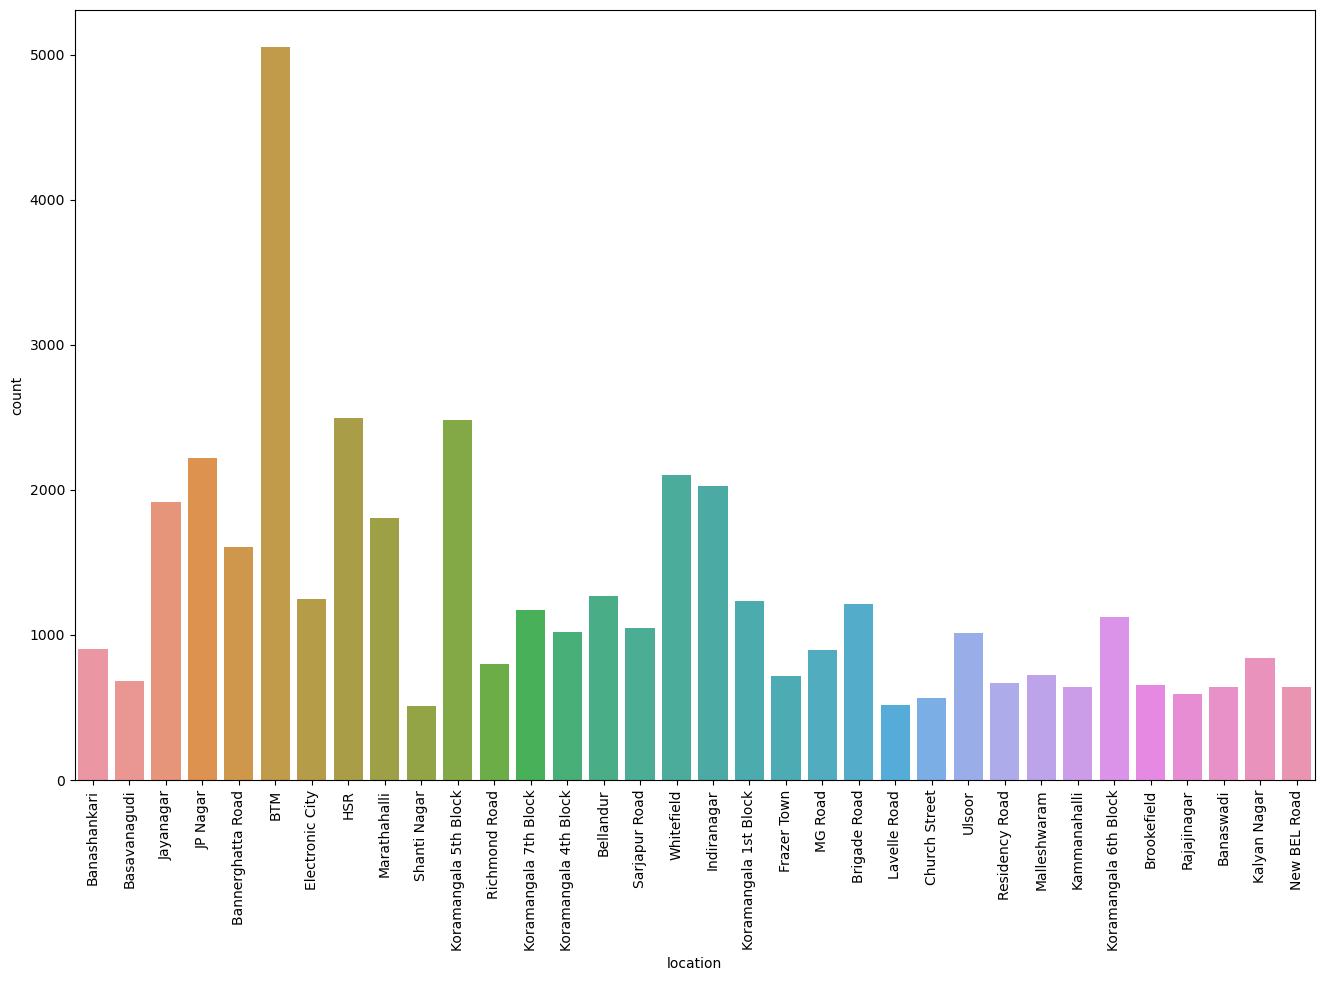

In [45]:
# Excluding 'others' from location column as it doesn't add value to the countplot
plt.figure(figsize= (16,10))
sns.countplot(x='location', data=df[-(df.location=='others')])
plt.xticks(rotation = 90)

*From the above countplot, we can infer that BTM locality has the most number of restaurants in the bangalore city followed by HSR and Koramangala 5th Block. So, if a entrepreneur were to open a new restaurant in one of these place then he/she may face tough competition.*

### Visualizing online order

<Axes: xlabel='online_order', ylabel='count'>

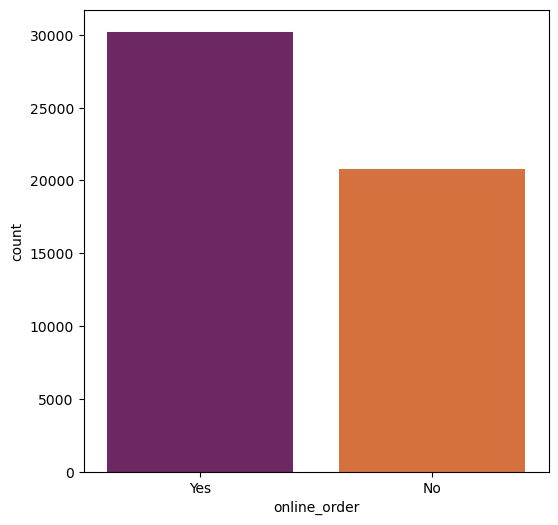

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='online_order', palette='inferno')

*Significant number of restaurants provide online order facility in Bangalore. Work culture is rapidly changing in metro cities and ordering food online is looked at as a convinient option. So, an entreprenuer should provide online order facility in new restaurant and an existing restaurant owner should start online order facility.*

### Visualizing booking

<Axes: xlabel='book_table', ylabel='count'>

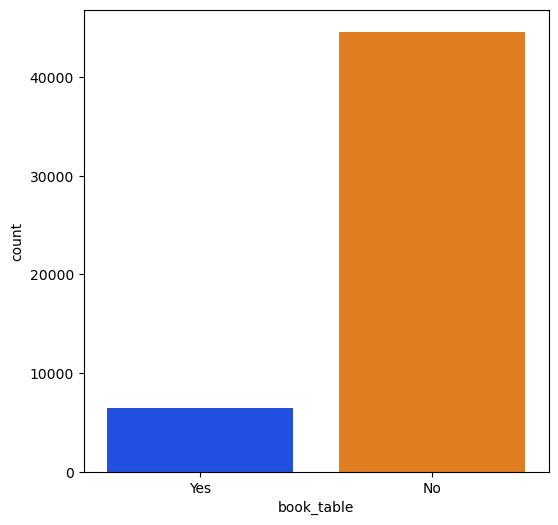

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['book_table'], palette='bright' )

*Most of the restaurants does not provide table booking facility.*

### Visualizing online order vs rate

<Axes: xlabel='online_order', ylabel='rate'>

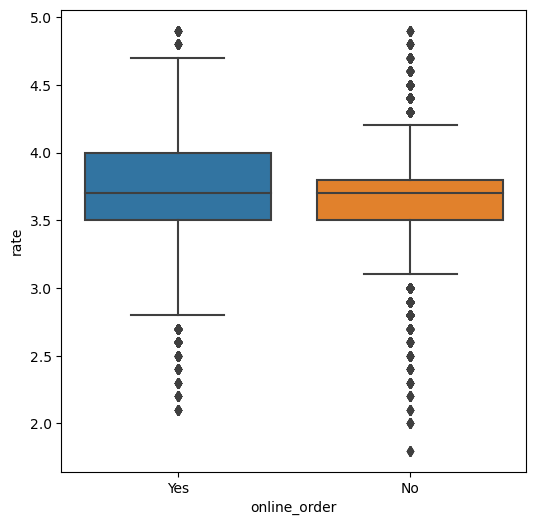

In [48]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)

*Both restaurants offering online order facility and who does not offer online order facility have median rating of approx 3.7 out of 5. However, restaurants offering online order facility have highest rating i.e. 4.7 out 5 as compared to the other who has 4.2 out of 5.*

### Visualizing booking vs rate

<Axes: xlabel='book_table', ylabel='rate'>

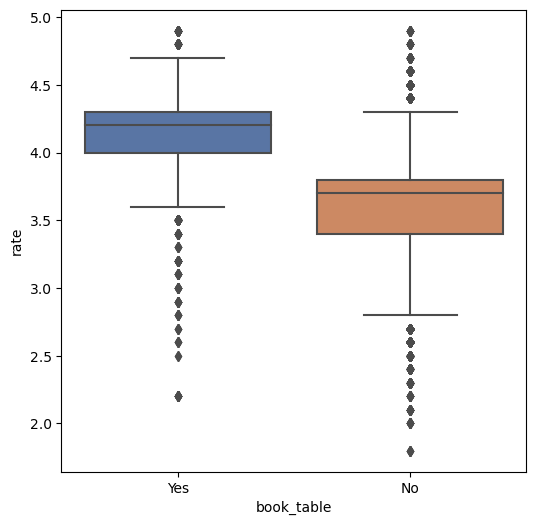

In [49]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table', y='rate', data=df, palette= 'deep')

*Here we can see considerable difference between median ratings of restaurants offering table booking facility and restaurants not offering this facility. Table booking facility allows customer to avoid queues or frustration of unavailability which results in customer delight and eventually higher ratings.*

### Visualizing location wise online order facility

In [50]:
df1 = df.groupby(['location','online_order'])['name'].count()

In [51]:
df1.to_csv('location_online.csv')

In [52]:
df1 = pd.read_csv('location_online.csv')

In [53]:
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=None, aggfunc=np.sum )
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Ulsoor                  389   622
Whitefield              986  1119
others                 3672  4335

<Axes: xlabel='location'>

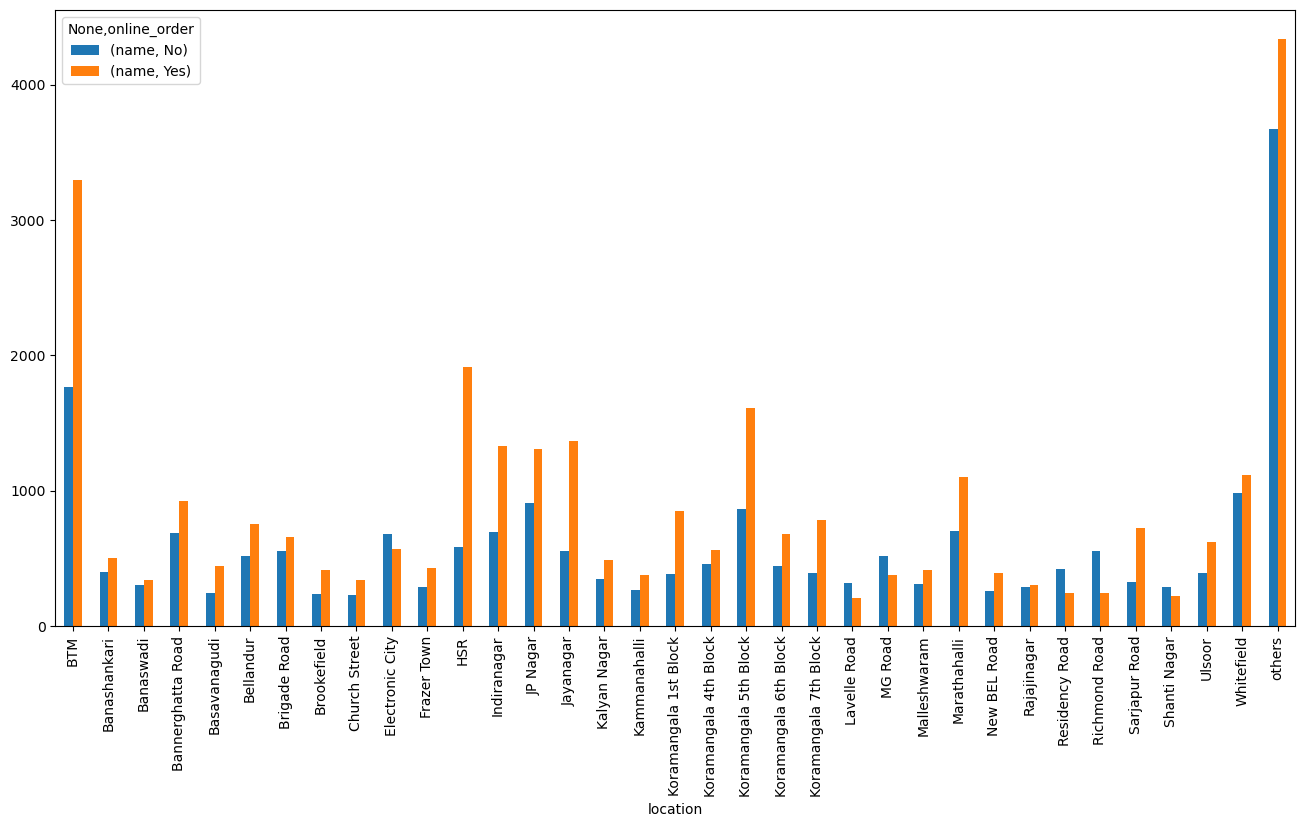

In [54]:
# visualizing online order facility wr.t location via bar plot
df1.plot(kind ='bar', figsize= (16,8))

*Above bargraph allows us to understand location wise number of restaurants offering online order facility.*

### Visualizing location wise booking facility 

In [55]:
df2 = df.groupby(['location','book_table'])['name'].count()

In [56]:
df2.to_csv('location_booking.csv')

In [57]:
df2 = pd.read_csv('location_booking.csv')

In [58]:
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Ulsoor                  834  177
Whitefield             1852  253
others                 7204  803

<Axes: xlabel='location'>

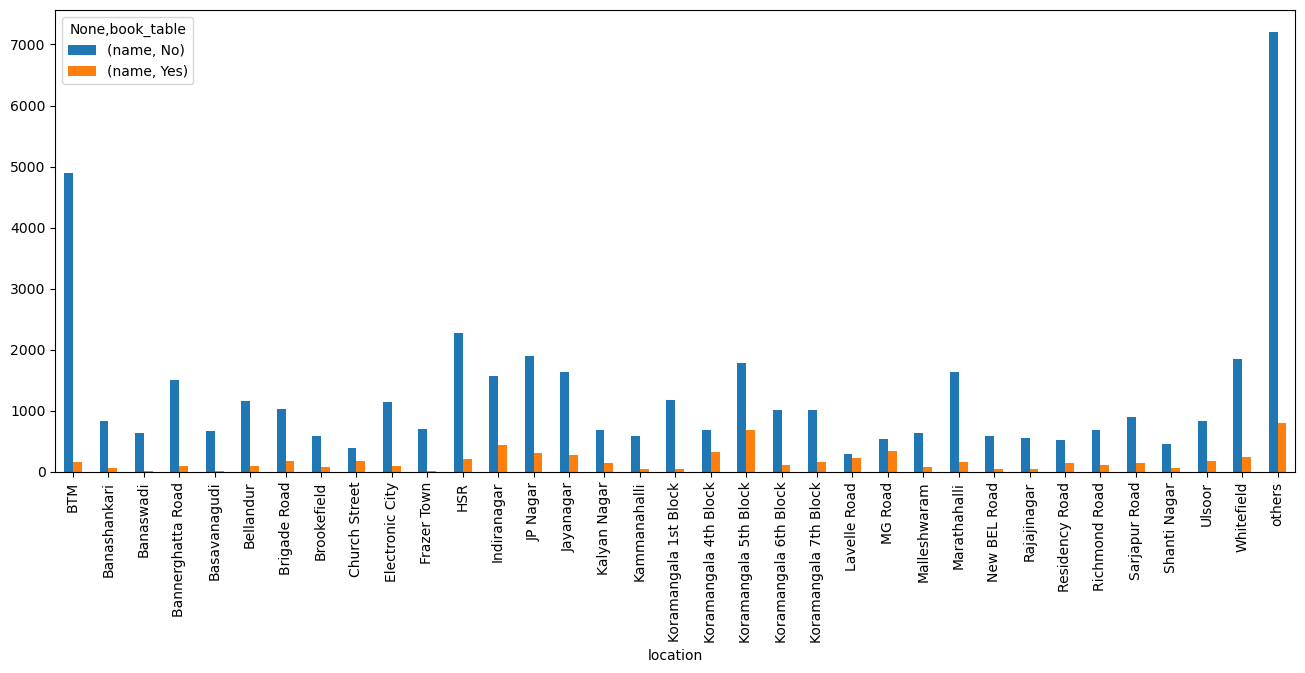

In [59]:
# visualizing booking facility w.r.t location via bar plot
df2.plot(kind='bar', figsize=(16,6))

*Above bargraph allows us to understand location wise number of restaurants offering table booking facility.*

### Visualizing types of restaurants w.r.t. ratings

<Axes: xlabel='type', ylabel='rate'>

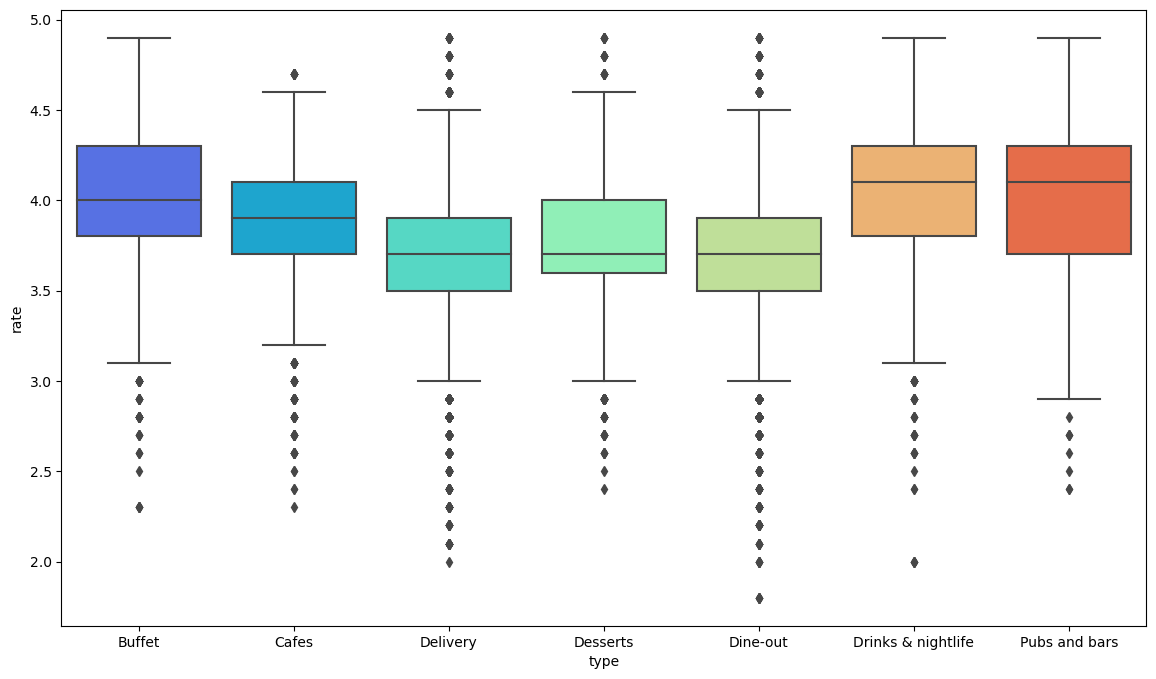

In [83]:
plt.figure(figsize = (14,8))
sns.boxplot(x='type', y='rate',data=df, palette='rainbow')

*From the above boxplot, we can conclude that 'Drinks and Nightlife' and 'Pubs and bars' types of restaurants have the highest median rating of 4.2 out of 5 and maximum rating of 4.9 out of along with 'Buffet' type of restaurant.*

### Visualizing location wise types of restaurants 

In [61]:
df3 = df.groupby(['location','type'])['name'].count()

In [62]:
df3.to_csv('location_type.csv')

In [63]:
df3 = pd.read_csv('location_type.csv')

In [64]:
df3 = pd.pivot_table(df3, values=None, index='location', columns='type',fill_value=None, aggfunc=np.sum)
df3

name                                    \
type                  Buffet  Cafes Delivery Desserts Dine-out   
location                                                         
BTM                     21.0   83.0   3053.0    198.0   1660.0   
Banashankari             7.0   36.0    418.0     71.0    356.0   
Banaswadi                NaN   24.0    310.0     37.0    262.0   
Bannerghatta Road        9.0   46.0    828.0    137.0    578.0   
Basavanagudi             7.0   11.0    344.0     66.0    251.0   
Bellandur               28.0   36.0    617.0     75.0    479.0   
Brigade Road            25.0   46.0    497.0    108.0    455.0   
Brookefield              6.0   17.0    339.0     45.0    245.0   
Church Street           19.0   51.0    193.0     29.0    215.0   
Electronic City         23.0   24.0    570.0     71.0    516.0   
Frazer Town              1.0   11.0    470.0     56.0    172.0   
HSR                     19.0   49.0   1694.0    120.0    580.0   
Indiranagar             38.0   97.0   1091.0    140.0    529.0   
JP Nagar                45.0   76.0   1151.0    166.0    722.0   
Jayanagar               27.0   77.0   1043.0    182.0    575.0   
Kalyan Nagar             9.0   45.0    366.0     88.0    315.0   
Kammanahalli             2.0   27.0    329.0     35.0    240.0   
Koramangala 1st Block    3.0   26.0    716.0     70.0    398.0   
Koramangala 4th Block   21.0   53.0    464.0     81.0    302.0   
Koramangala 5th Block   65.0  146.0   1075.0    209.0    842.0   
Koramangala 6th Block   18.0   43.0    511.0     70.0    411.0   
Koramangala 7th Block   25.0   52.0    503.0    127.0    417.0   
Lavelle Road            30.0   27.0    127.0     50.0    191.0   
MG Road                 51.0   76.0    266.0     68.0    343.0   
Malleshwaram            11.0   31.0    269.0     85.0    291.0   
Marathahalli            34.0   32.0    980.0    105.0    630.0   
New BEL Road             4.0   29.0    338.0     33.0    224.0   
Rajajinagar             10.0    4.0    258.0     55.0    251.0   
Residency Road          20.0   31.0    187.0     63.0    289.0   
Richmond Road           63.0   21.0    257.0     78.0    356.0   
Sarjapur Road           25.0   22.0    558.0     82.0    319.0   
Shanti Nagar             9.0   22.0    198.0     39.0    229.0   
Ulsoor                  16.0   56.0    456.0     71.0    359.0   
Whitefield              28.0   51.0   1041.0    137.0    768.0   
others                 150.0  225.0   4062.0    512.0   2792.0   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                 22.0          19.0  
Banashankari                        14.0           NaN  
Banaswadi                            6.0           1.0  
Bannerghatta Road                    9.0           2.0  
Basavanagudi                         5.0           NaN  
Bellandur                           17.0          16.0  
Brigade Road                        57.0          22.0  
Brookefield                          4.0           NaN  
Church Street                       36.0          23.0  
Electronic City                     21.0          21.0  
Frazer Town                          2.0           2.0  
HSR                                 14.0          18.0  
Indiranagar                         65.0          66.0  
JP Nagar                            51.0           7.0  
Jayanagar                           12.0           NaN  
Kalyan Nagar                        18.0           NaN  
Kammanahalli                         6.0           NaN  
Koramangala 1st Block                7.0          16.0  
Koramangala 4th Block               62.0          34.0  
Koramangala 5th Block               84.0          58.0  
Koramangala 6th Block               51.0          23.0  
Koramangala 7th Block               25.0          25.0  
Lavelle Road                        59.0          34.0  
MG Road                          

<Axes: xlabel='location'>

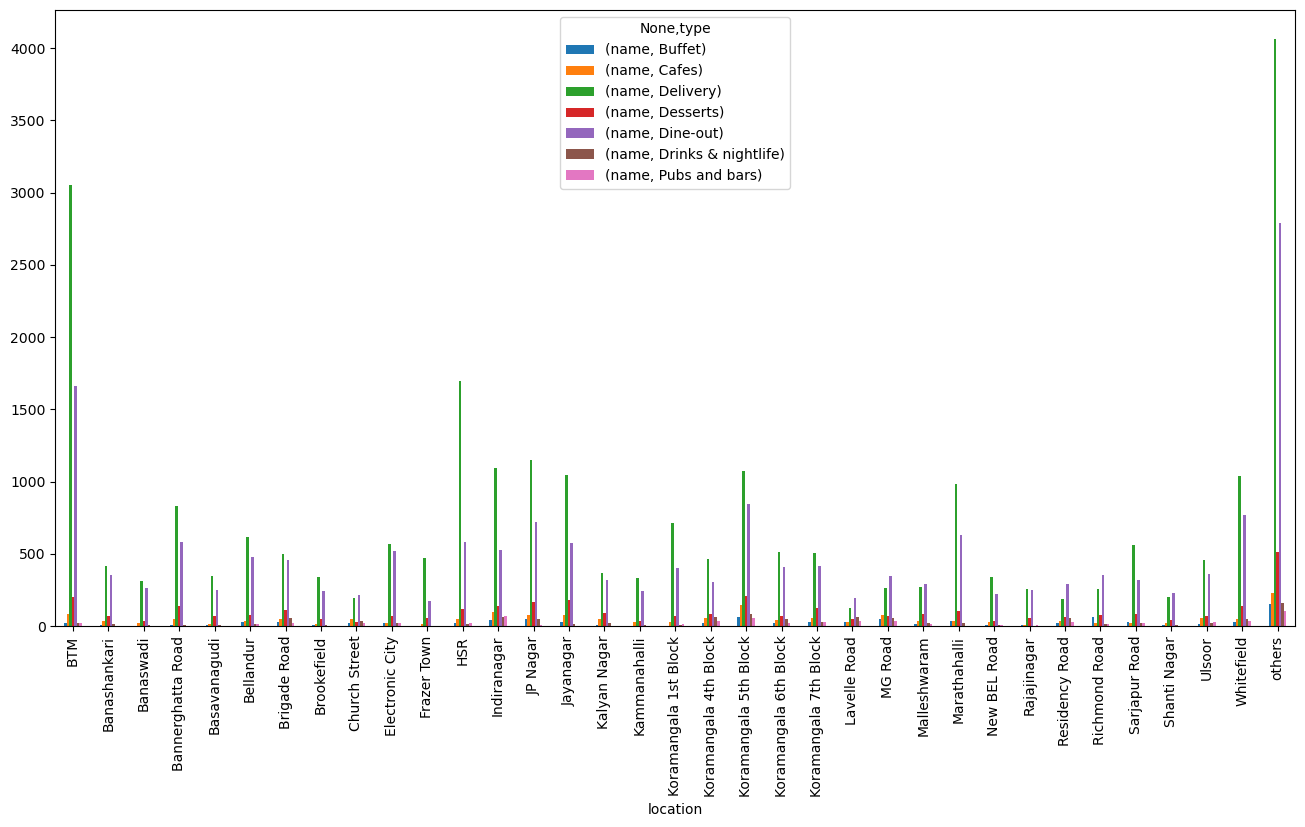

In [87]:
df3.plot(kind='bar',figsize=(16,8))

*Above bargraph allows us to understand location wise types of restaurants. We can conclude that most of the locations have highest 'delivery' restaurants amongst other types which shows strong order in culture in Banglore.*

### Visualizing location wise number of votes

In [89]:
df4 = df[['location','votes']]

In [90]:
df4.drop_duplicates()

,location,votes
0,Banashankari,775
1,Banashankari,787
2,Banashankari,918
3,Banashankari,88
4,Basavanagudi,166
...,...,...
51328,Whitefield,152
51547,Whitefield,203
51606,others,848
51628,Bellandur,411


In [91]:
df5 = df4.groupby(['location'])['votes'].sum()

In [92]:
df5 = df5.to_frame()

In [93]:
df5 = df5.sort_values('votes', ascending= False )
df5.head()

,votes
location,
Koramangala 5th Block,2214083
others,1410176
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'others'),
  Text(2, 0, 'Indiranagar'),
  Text(3, 0, 'Koramangala 4th Block'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Koramangala 1st Block'),
  Text(19, 0, 'Malleshwaram'),
  Text(20, 0, 'Bannerghatta Road'),
  Text(21, 0, 'Bellandur'),
  Text(22, 0, 'Ulsoor'),
  Text(23, 0, 'New BEL Road'),
  Text(24, 0, 'Kalyan Nagar'),
  Text(25, 0, 'Banashankari'),
  Text(26, 0, 'Brookefield'),
  

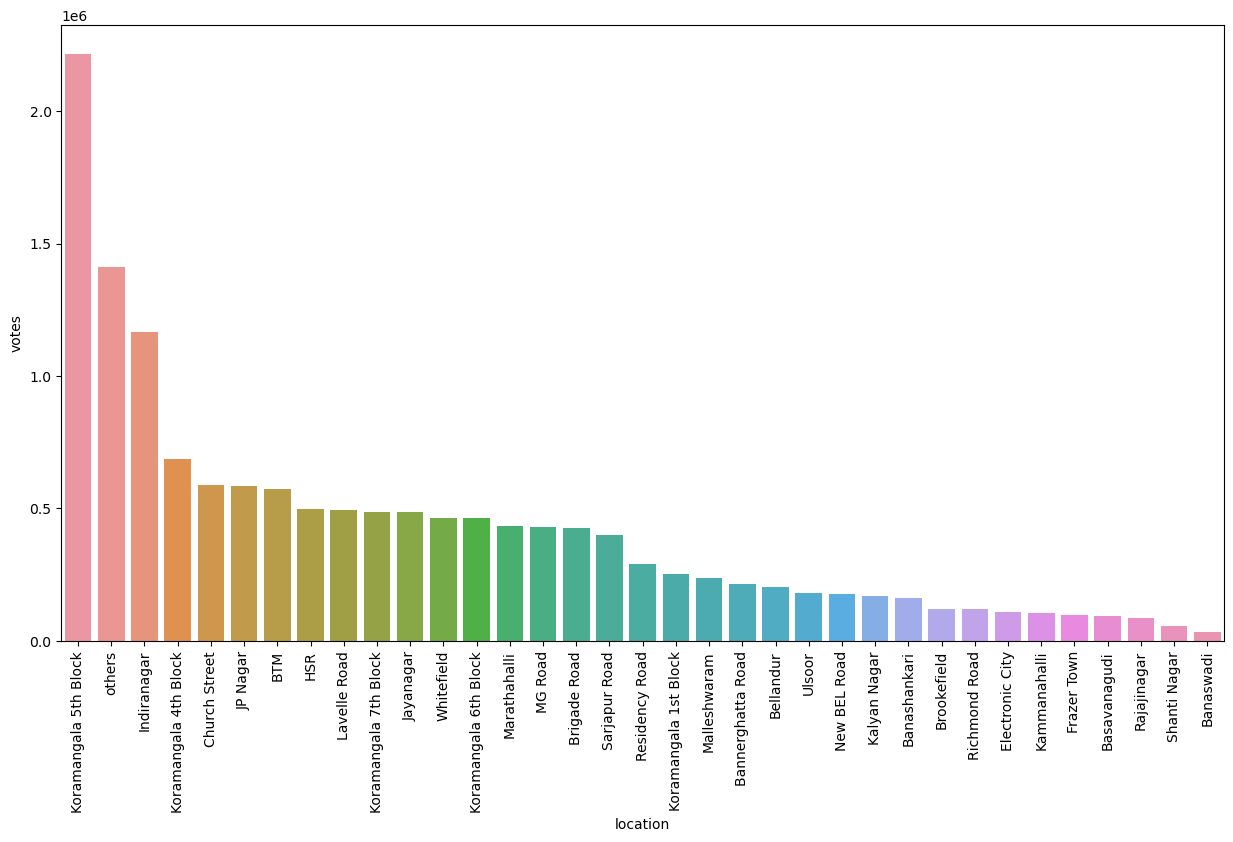

In [97]:
plt.figure(figsize = (15,8))
sns.barplot(data=df5, x= df5.index, y='votes')
plt.xticks(rotation = 90)

*Above bargraph shows location wise number of votes given.*

### Visualizing top cuisine

In [72]:
df6 = df[['cuisines','votes']]

In [73]:
df6.drop_duplicates()

,cuisines,votes
0,others,775
1,others,787
2,others,918
3,"South Indian, North Indian",88
4,others,166
...,...,...
51540,"North Indian, South Indian, Chinese",11
51547,"South Indian, North Indian, Chinese",203
51590,"North Indian, Chinese",515
51607,Finger Food,236


In [74]:
df7 = df6.groupby(['cuisines'])['votes'].sum()

In [75]:
df7 = df7.to_frame()

In [76]:
df7 = df7.sort_values('votes', ascending= False)
df7.head()

,votes
cuisines,
others,12411206
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
Chinese,101728


In [77]:
# Removing 'others' cuisine from the table
df7 = df7.iloc[1: , :]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
Chinese,101728
Cafe,89986


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'Chinese'),
  Text(4, 0, 'Cafe'),
  Text(5, 0, 'North Indian, South Indian'),
  Text(6, 0, 'Desserts'),
  Text(7, 0, 'Chinese, Momos'),
  Text(8, 0, 'Ice Cream, Desserts'),
  Text(9, 0, 'South Indian, North Indian, Chinese'),
  Text(10, 0, 'Desserts, Beverages'),
  Text(11, 0, 'Biryani'),
  Text(12, 0, 'Finger Food'),
  Text(13, 0, 'Bakery, Desserts'),
  Text(14, 0, 'North Indian, Chinese, Biryani'),
  Text(15, 0, 'Mithai, Street Food'),
  Text(16, 0, 'North Indian, South Indian, Chinese'),
  Text(17, 0, 'Desserts, Ice Cream'),
  Text(18, 0, 'Biryani, North Indian'),
  Text(19, 0, 'Fast Food'),
  Text(20, 0, 'Chinese, North Indian'),
  Text(21, 0, 'North Indian, Biryani'),
  Text(22, 0, 'Biryani, Kebab'),

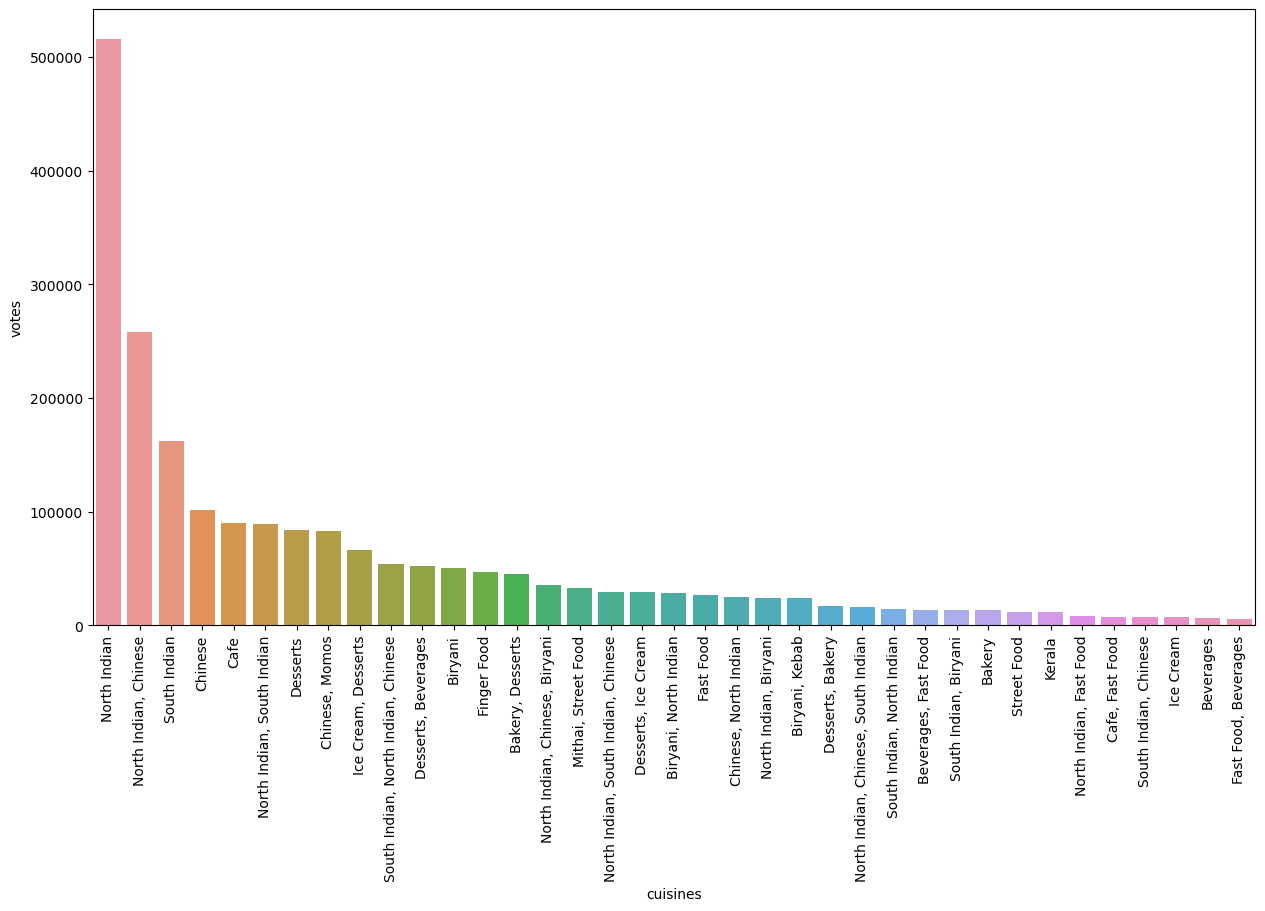

In [78]:
# visualizing types of restaurants w.r.t votes
plt.figure(figsize = (15,8))
sns.barplot(data=df7, x= df7.index, y='votes')
plt.xticks(rotation = 90)

*Suprisingly 'North Indian' cuisine is the top cuisine in Banglore which is located in South India. This shows that a lot of people from all over the country have emigrated in the city as banglore is the tech hub of india. So, an entrepreneur needs have some differenciating factor if he/she wants to offer north indian cuisine.*

## Conslusion

<p style='text-align: justify;'>In conclusion, the exploratory data analysis of restaurant data in Bangalore has revealed several interesting insights. Firstly, the dominance of 'North Indian' cuisine in a city located in South India suggests the diverse population of Bangalore due to its status as the tech hub of India. For an entrepreneur planning to offer North Indian cuisine, it is crucial to have a differentiating factor to stand out in this competitive market.

The prevalence of 'delivery' restaurants in most locations indicates a strong ordering culture in Bangalore. This insight can be valuable for businesses looking to establish themselves in this market.

'Drinks and Nightlife' and 'Pubs and bars' restaurant types tend to have the highest median ratings, indicating a strong preference for these establishments. Buffet-style restaurants also perform well in terms of ratings.

There is a significant difference in median ratings between restaurants offering table booking and those that do not. This highlights the importance of providing a table booking facility to enhance customer satisfaction and, ultimately, restaurant ratings.

Lastly, the availability of online ordering is a significant trend in Bangalore. As the work culture rapidly evolves in metro cities, providing online order facilities can be a convenient option for both new entrepreneurs looking to start a restaurant and existing restaurant owners.

In conclusion, the insights gathered from this exploratory data analysis can guide entrepreneurs and restaurant owners in making informed decisions to succeed in Bangalore's dynamic and competitive restaurant industry.</p>